# 1.4.6 Image Gradients

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

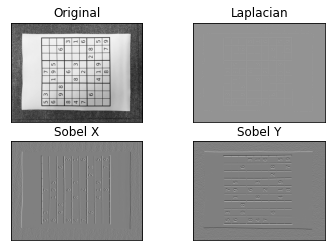

In [3]:
img = cv2.imread('sIMG_2164.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# 1.4.7 Canny Edge Detection

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

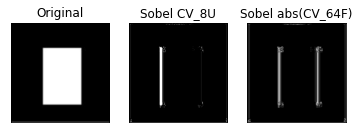

In [5]:
img = cv2.imread('box.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

# 1.4.8 Image Pyramids

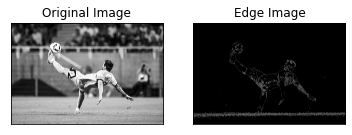

In [6]:
img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
import cv2
import numpy as np,sys

In [9]:
A = cv2.imread('apple.jpg')
B = cv2.imread('orange.jpg')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols/2], lb[:,cols/2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols/2],B[:,cols/2:]))

cv2.imwrite('Pyramid_blending2.jpg',ls_)
cv2.imwrite('Direct_blending.jpg',real)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


# 1.4.9 Contours in OpenCV

In [2]:
import numpy as np
import cv2

im = cv2.imread('test.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [5]:
import cv2
import numpy as np

img = cv2.imread('star.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print (M)

{'m00': 2029.0, 'm10': 199283.66666666666, 'm01': 199882.5, 'm20': 19974182.166666664, 'm11': 19631765.333333332, 'm02': 20272410.333333332, 'm30': 2040492911.9, 'm21': 1967675158.0833333, 'm12': 1991154506.2166667, 'm03': 2111626724.25, 'mu20': 401003.3593176678, 'mu11': -229.49293576553464, 'mu02': 581422.7501642816, 'mu30': -96097.67231583595, 'mu21': 7342.143795400858, 'mu12': 90671.73937635869, 'mu03': -20650.89633989334, 'nu20': 0.09740559796156029, 'nu11': -5.57449111504512e-05, 'nu02': 0.14123031473993813, 'nu30': -0.0005182123402805732, 'nu21': 3.959294150628638e-05, 'nu12': 0.0004889526783240306, 'nu03': -0.00011136117101791801}


In [6]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [7]:
area = cv2.contourArea(cnt)

In [8]:
perimeter = cv2.arcLength(cnt,True)

In [9]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [10]:
hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]

SyntaxError: invalid syntax (1142598454.py, line 1)

In [11]:
hull = cv2.convexHull(cnt)

In [12]:
k = cv2.isContourConvex(cnt)

In [13]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [18]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(im,[box],0,(0,0,255),2)

In [16]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(im,ellipse,(0,255,0),2)

In [15]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

In [17]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

In [19]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

In [20]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

In [21]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

In [22]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

In [23]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

In [25]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

In [26]:
mean_val = cv2.mean(im,mask = mask)

In [ ]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

In [24]:
mask = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)


In [27]:
import cv2
import numpy as np

img = cv2.imread('star.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('star.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
dist = cv2.pointPolygonTest(cnt,(50,50),True)

In [ ]:
img1 = cv2.imread('star.jpg',0)
img2 = cv2.imread('star2.jpg',0)

ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print ret

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

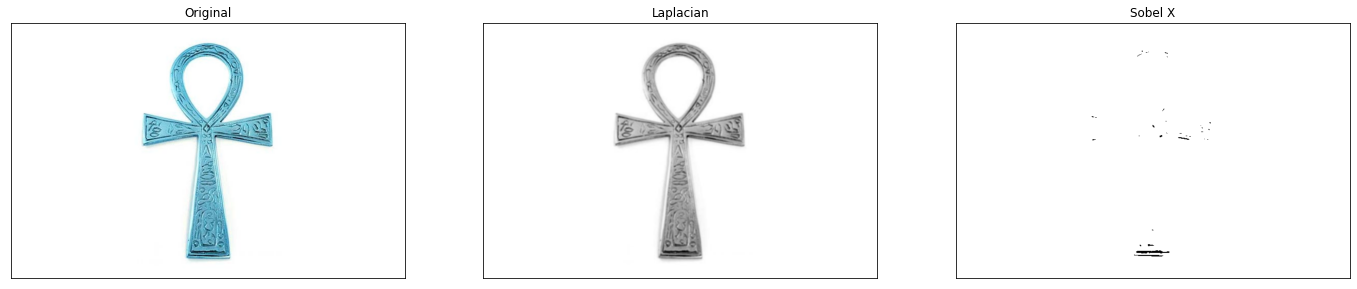

In [3]:
im = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,100,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

In [5]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

{'m00': 319.5, 'm10': 122237.33333333333, 'm01': 143353.16666666666, 'm20': 46869810.75, 'm11': 54845872.541666664, 'm02': 64320425.25, 'm30': 18010946031.7, 'm21': 21029904185.6, 'm12': 24608730573.066666, 'm03': 28859958958.550003, 'mu20': 103095.06785776466, 'mu11': 461.5300165191293, 'mu02': 768.3067727386951, 'mu30': 164146.66868972778, 'mu21': 18037.0027538985, 'mu12': -522.4098909441964, 'mu03': -100.4541015625, 'nu20': 1.0099413731624352, 'nu11': 0.004521246926012909, 'nu02': 0.0075264977577807176, 'nu30': 0.08996113312217421, 'nu21': 0.00988523994316084, 'nu12': -0.0002863084954371199, 'nu03': -5.505420777325833e-05}


In [6]:
len(contours)

40

In [7]:
for i in range(len(contours)):
    print(contours[i].shape)

(4, 1, 2)
(16, 1, 2)
(41, 1, 2)
(8, 1, 2)
(13, 1, 2)
(8, 1, 2)
(6, 1, 2)
(8, 1, 2)
(4, 1, 2)
(18, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(12, 1, 2)
(6, 1, 2)
(4, 1, 2)
(4, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(4, 1, 2)
(11, 1, 2)
(7, 1, 2)
(6, 1, 2)
(6, 1, 2)
(8, 1, 2)
(4, 1, 2)
(4, 1, 2)
(6, 1, 2)
(4, 1, 2)
(4, 1, 2)
(6, 1, 2)
(4, 1, 2)
(6, 1, 2)
(6, 1, 2)
(4, 1, 2)
(10, 1, 2)
(6, 1, 2)
(4, 1, 2)
(8, 1, 2)


In [8]:
cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [9]:
hull = cv2.convexHull(approx)

In [10]:
x,y,w,h = cv2.boundingRect(cnt)

In [11]:
area = cv2.contourArea(cnt)

In [12]:
perimeter = cv2.arcLength(cnt,True)

##### What is Hierarchy?


In [29]:
hierarchy

array([[[-1, -1, -1, -1]]], dtype=int32)